<a href="https://colab.research.google.com/github/dayaiit/Machine-Learning/blob/main/Bias_and_Variance_L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: Linear Model
Training Error: 1691.03
Test Error: 1256.41
Baseline Error: 30.00
Bias Gap (train_error - baseline): 1661.03
Variance Gap (test_error - train_error): -434.62
Diagnosis: HIGH BIAS problem (Underfitting)



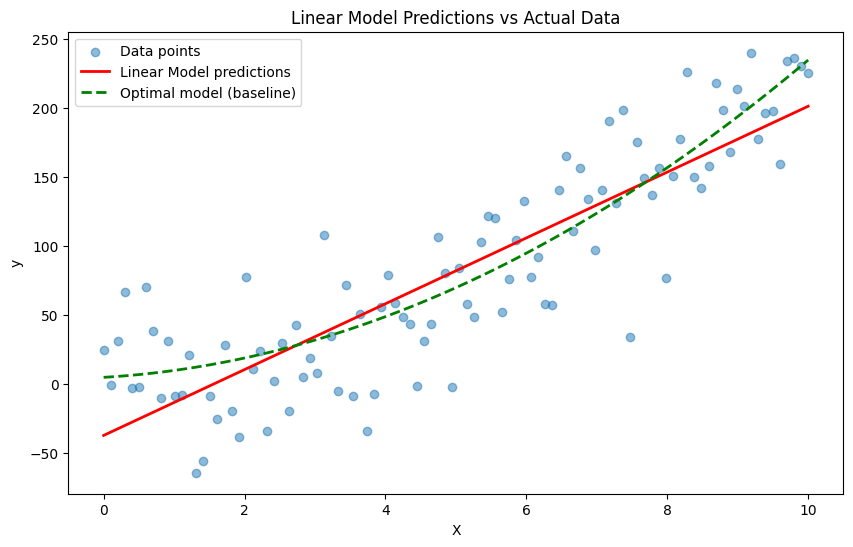

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: Random Forest
Training Error: 291.49
Test Error: 1494.31
Baseline Error: 30.00
Bias Gap (train_error - baseline): 261.49
Variance Gap (test_error - train_error): 1202.81
Diagnosis: HIGH VARIANCE problem (Overfitting)



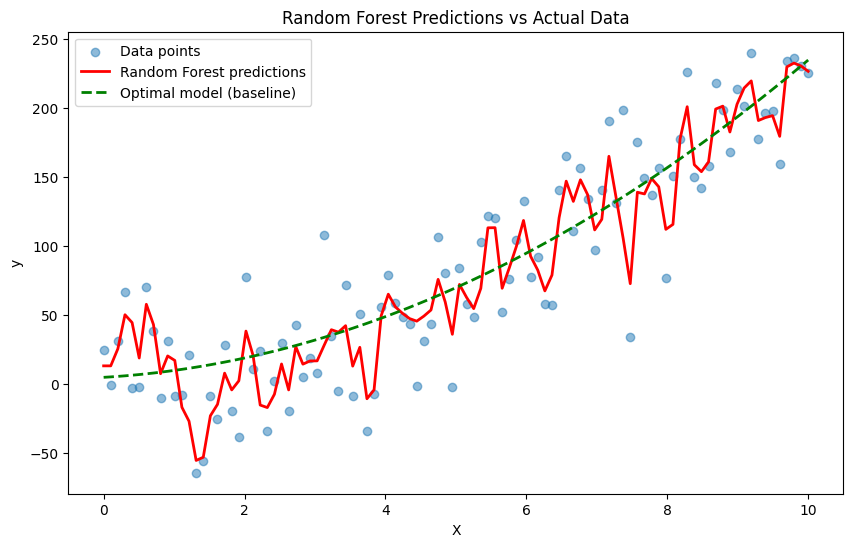

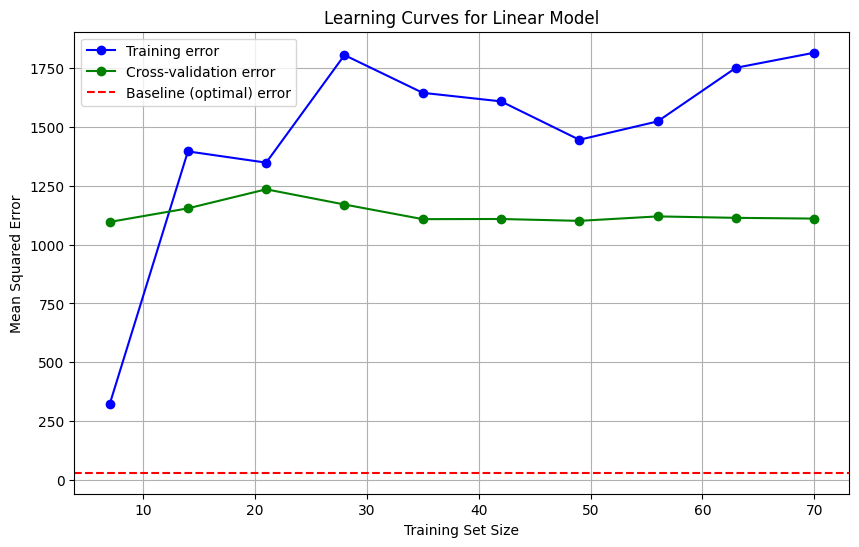

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

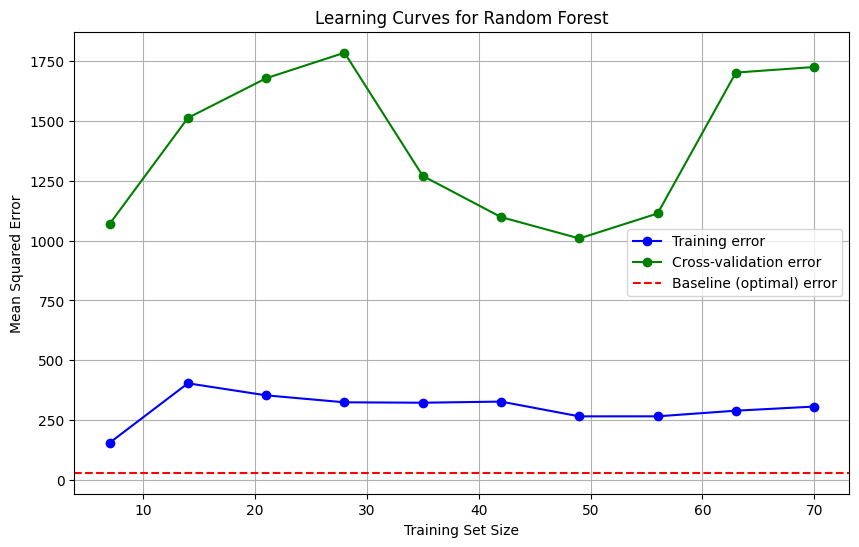

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: More Complex Model
Training Error: 293.67
Test Error: 1488.31
Baseline Error: 30.00
Bias Gap (train_error - baseline): 263.67
Variance Gap (test_error - train_error): 1194.64
Diagnosis: HIGH VARIANCE problem (Overfitting)



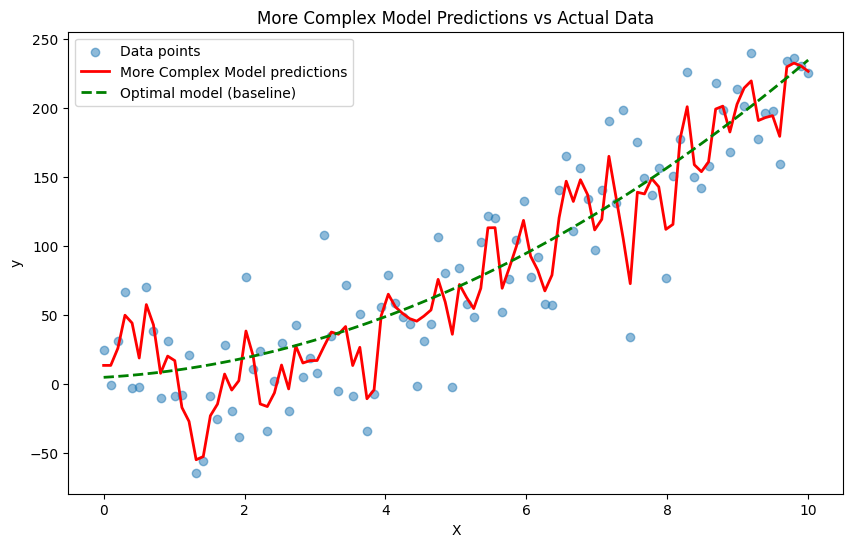

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: Simplified Model with Regularization
Training Error: 1019.65
Test Error: 1300.71
Baseline Error: 30.00
Bias Gap (train_error - baseline): 989.65
Variance Gap (test_error - train_error): 281.06
Diagnosis: HIGH BIAS problem (Underfitting)



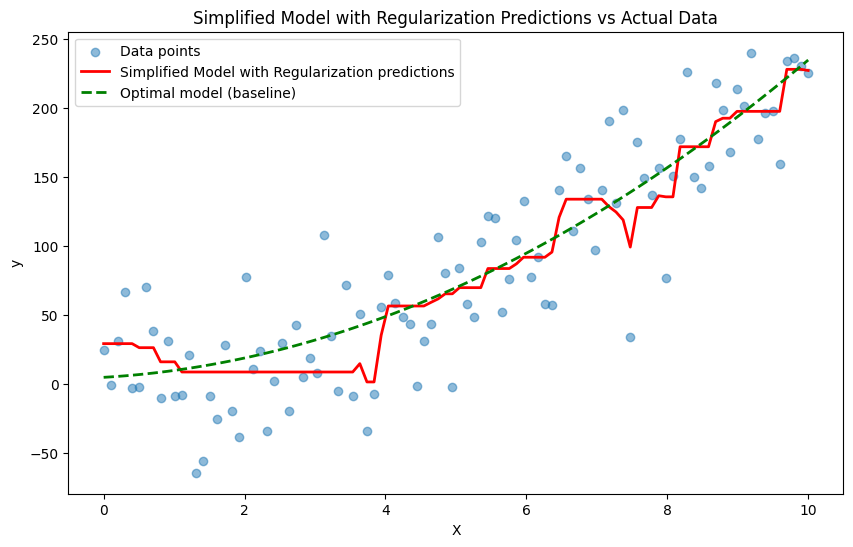

In [1]:
# Bias and Variance Analysis in Machine Learning
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Generate some example data (a quadratic function with noise)
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X**2 + 3 * X + 5 + np.random.normal(0, 40, X.shape)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to analyze bias and variance
def analyze_bias_variance(model_name, model, X_train, y_train, X_test, y_test, baseline_error=None):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate errors
    train_error = mean_squared_error(y_train, train_pred)
    test_error = mean_squared_error(y_test, test_pred)

    print(f"Model: {model_name}")
    print(f"Training Error: {train_error:.2f}")
    print(f"Test Error: {test_error:.2f}")

    # Analyze bias and variance
    if baseline_error is not None:
        bias_gap = train_error - baseline_error
        variance_gap = test_error - train_error

        print(f"Baseline Error: {baseline_error:.2f}")
        print(f"Bias Gap (train_error - baseline): {bias_gap:.2f}")
        print(f"Variance Gap (test_error - train_error): {variance_gap:.2f}")

        # Determine if high bias or high variance
        if bias_gap > variance_gap and bias_gap > 50:
            print("Diagnosis: HIGH BIAS problem (Underfitting)")
        elif variance_gap > bias_gap and variance_gap > 50:
            print("Diagnosis: HIGH VARIANCE problem (Overfitting)")
        elif bias_gap > 50 and variance_gap > 50:
            print("Diagnosis: BOTH high bias and high variance")
        else:
            print("Diagnosis: Model is performing well")

    print()

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.5, label='Data points')
    plt.plot(X, model.predict(X), color='red', linewidth=2, label=f'{model_name} predictions')

    # If we have a baseline model, plot it
    if baseline_error is not None:
        # For demonstration, we'll assume the true function (without noise) as our baseline
        plt.plot(X, 2 * X**2 + 3 * X + 5, 'g--', linewidth=2, label='Optimal model (baseline)')

    plt.title(f'{model_name} Predictions vs Actual Data')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Example 1: Using a simple linear model (likely high bias for our quadratic data)
linear_model = LinearRegression()
# We'll use 30 as an example baseline error (in a real-world scenario, this might be human performance)
analyze_bias_variance("Linear Model", linear_model, X_train, y_train, X_test, y_test, baseline_error=30)

# Example 2: Using a complex model with default parameters (might have high variance)
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
analyze_bias_variance("Random Forest", forest_model, X_train, y_train, X_test, y_test, baseline_error=30)

# Example 3: Learning Curves
def plot_learning_curves(model_name, model, X, y, baseline_error=None):
    # Split data into training and cross-validation sets
    X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=42)

    training_errors = []
    cv_errors = []

    # Try different training set sizes
    train_sizes = np.linspace(0.1, 1.0, 10)

    for size in train_sizes:
        # Use a subset of the training data
        subset_size = int(len(X_train) * size)
        X_subset = X_train[:subset_size]
        y_subset = y_train[:subset_size]

        # Train the model
        model.fit(X_subset, y_subset)

        # Calculate errors
        train_pred = model.predict(X_subset)
        cv_pred = model.predict(X_cv)

        train_error = mean_squared_error(y_subset, train_pred)
        cv_error = mean_squared_error(y_cv, cv_pred)

        training_errors.append(train_error)
        cv_errors.append(cv_error)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes * len(X_train), training_errors, 'o-', color='b', label='Training error')
    plt.plot(train_sizes * len(X_train), cv_errors, 'o-', color='g', label='Cross-validation error')

    if baseline_error is not None:
        plt.axhline(y=baseline_error, color='r', linestyle='--', label='Baseline (optimal) error')

    plt.title(f'Learning Curves for {model_name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot learning curves for both models
plot_learning_curves("Linear Model", LinearRegression(), X, y, baseline_error=30)
plot_learning_curves("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42), X, y, baseline_error=30)

# Try different model complexities to fix bias/variance issues

# For high bias problem (try more complex model)
complex_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
analyze_bias_variance("More Complex Model", complex_model, X_train, y_train, X_test, y_test, baseline_error=30)

# For high variance problem (try regularization/simpler model)
simpler_model = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)
analyze_bias_variance("Simplified Model with Regularization", simpler_model, X_train, y_train, X_test, y_test, baseline_error=30)